In [1]:
import sys
sys.path.append("../../src/")
import IEA_model
import numpy as np
import torch
import pandas as pd
from torch.utils.data import DataLoader
import utility

from importlib import reload 

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 

from sklearn.metrics import r2_score

# Loading data

In [2]:
thold = 0.01

df_genes = utility.load_gene_data()

df = pd.read_csv("../../gene_list_PCA/THOLD_{}.txt".format(thold))
idx_gene = df["index"].to_numpy()


In [3]:
gene_list = [ggg for ggg in df_genes.columns if "ENSG" in ggg]
genes_selected = [gene_list[ggg] for ggg in idx_gene]

In [4]:
df_test = pd.read_csv("../../output/IEA_test.csv").set_index("sid")
df_PCs = utility.load_SSL_PCs()

df_used = pd.merge(df_test, df_PCs, left_index = True, right_index = True)
df_used = pd.merge(df_used, df_genes, left_index = True, right_index = True)



# Variance Explained for all genes

In [5]:
R2_IEA = []

X = df_used[ ["IEA0", "IEA1"] ].to_numpy()
y = df_used[ gene_list ].to_numpy()

M = LinearRegression()
M.fit(X, y)
y_pred = M.predict(X)

for iii in range(y.shape[1]):
    R2_IEA.append( r2_score( y[:, iii], y_pred[:, iii]) )



In [6]:
R2_PC = []

X = df_used[ ["PC0_P2", "PC1_P2"] ].to_numpy()
y = df_used[ gene_list ].to_numpy()

M = LinearRegression()
M.fit(X, y)
y_pred = M.predict(X)

for iii in range(y.shape[1]):
    R2_PC.append( r2_score( y[:, iii], y_pred[:, iii]) )



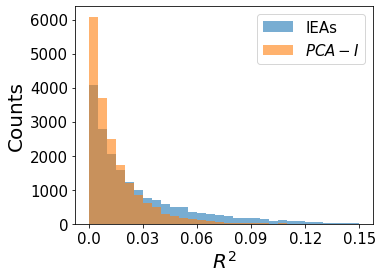

In [7]:
plt.figure(figsize = [12, 4])

plt.subplots_adjust(wspace = .25)

plt.subplot(1, 2, 1)
y1, x1, fig = plt.hist(R2_IEA, bins = 30, range=(0., .15), alpha = .6, label = "IEAs")
y2, x2, fig = plt.hist(R2_PC, bins = 30, range=(0., .15), alpha = .6, label = "$PCA-I$")

plt.xlabel("$R^2$", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(np.linspace(0, .15, 6), np.linspace(0, .15, 6), fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)


# Variance Explained for selected genes

In [8]:
R2_IEA = []

X = df_used[ ["IEA0", "IEA1"] ].to_numpy()
y = df_used[ genes_selected ].to_numpy()

M = LinearRegression()
M.fit(X, y)
y_pred = M.predict(X)

for iii in range(y.shape[1]):
    R2_IEA.append( r2_score( y[:, iii], y_pred[:, iii]) )



In [9]:
R2_PC = []

X = df_used[ ["PC0_P2", "PC1_P2"] ].to_numpy()
y = df_used[ genes_selected ].to_numpy()

M = LinearRegression()
M.fit(X, y)
y_pred = M.predict(X)

for iii in range(y.shape[1]):
    R2_PC.append( r2_score( y[:, iii], y_pred[:, iii]) )



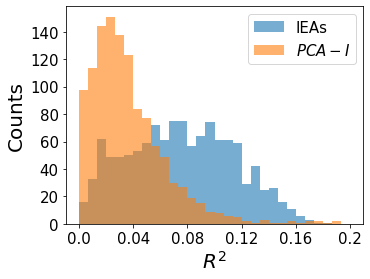

In [10]:
plt.figure(figsize = [12, 4])

plt.subplots_adjust(wspace = .25)

plt.subplot(1, 2, 1)
y1, x1, fig = plt.hist(R2_IEA, bins = 30, range=(0., .2), alpha = .6, label = "IEAs")
y2, x2, fig = plt.hist(R2_PC, bins = 30, range=(0., .2), alpha = .6, label = "$PCA-I$")

plt.xlabel("$R^2$", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(np.linspace(0, .2, 6), np.linspace(0, .2, 6), fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
